# 最単路問題


In [158]:
#| default_exp myshortestpath

In [159]:
#| hide
from nbdev.showdoc import *

扱いたい場所の住所が書かれたcsvファイルを用意し，[CSVアドレスマッチングサービス](https://geocode.csis.u-tokyo.ac.jp/home/csv-admatch/)を用いてそれらの住所に対応する緯度経度を取得する。


ここでは，青山学院大学の青山キャンパスと相模原キャンパスの緯度経度を取得する。具体的には，1行目に東京都渋谷区渋谷4-4-25,2行目に神奈川県相模原市中央区淵野辺5-10-1と書いたcsvファイルをagu.csvという名前で保存する。

>東京都渋谷区渋谷4-4-25
>
>神奈川県相模原市中央区淵野辺5-10-1

CSVアドレスマッチングサービスのページで「変換したいファイル名」でagu.csvを選ぶ。送信ボタンを押すと，これら2つの住所に対応する緯度経度が書かれたcsvファイルがダウンロードされる。これから，東京都渋谷区渋谷4-4-25の緯度経度は(35.66049,139.71027)で，神奈川県相模原市中央区淵野辺5-10-1の緯度経度は(35.56805,139.40280)であることがわかる。これらを，辞書


In [160]:
myadd={"aocam":(35.66049,139.71027),"sagacam":(35.56805,139.40280)}


In [161]:
myadd["aocam"]

(35.66049, 139.71027)

In [162]:
import osmnx as ox
import networkx as nx
from osmnx import distance
import folium
def myshortestpath(from_loc,to_loc):
    #起点と終点を含む地域の道路ネットワークを取得
    north= max(from_loc[0],to_loc[0])
    south=min(from_loc[0],to_loc[0])
    east=max(from_loc[1],to_loc[1])
    west=min(from_loc[1],to_loc[1])


    G=ox.graph_from_bbox(north,south,east,west,network_type='drive')
    #起点と終点のノードを取得
    from_node=distance.nearest_nodes(G,from_loc[1],from_loc[0])
    to_node=distance.nearest_nodes(G,to_loc[1],to_loc[0])

    #最短路の計算
    path=nx.shortest_path(G,from_node,to_node,weight='length')
    print("最短路の距離 {:,} meters".format(int(nx.shortest_path_length(G,from_node,to_node,weight='length'))))
    fig,ax=ox.plot_graph_route(G,path,route_color='r',node_size=0)

    return G,path

最短路の距離 32,163 meters


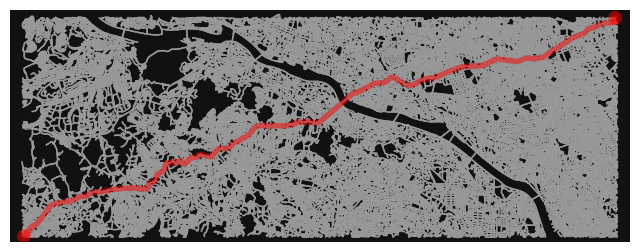

In [163]:
G,path=myshortestpath(myadd["aocam"],myadd["sagacam"])

In [164]:
# explore a route interactively
route_edges = ox.utils_graph.route_to_gdf(G, path, weight)
route_edges.explore(tiles="cartodbpositron", style_kwds={"weight": 5})

In [165]:
#| hide
import nbdev; nbdev.nbdev_export()